### 1. Regular Gradient Descent with partial derivatives

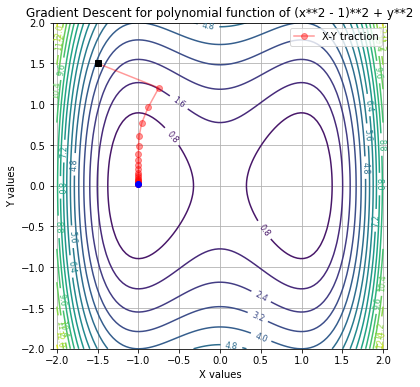

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return  (x**2 - 1)**2 + y**2

def grad_f(x, y):
    df_dx = 4 * x * (x**2 - 1)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

def gradient(x0, eta, n_iter):
    points = [x0]

    x = x0
    for i in range(n_iter):
        x = x - eta * grad_f(*x)
        points.append(x)

    return np.array(points)

if __name__ == '__main__':
    
    x0 = np.array([-1.5, 1.5])
    eta = 0.1
    n_iter = 20

    points = gradient(x0, eta, n_iter)

    x, y = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig, ax = plt.subplots(figsize=(6, 6))
    cs = ax.contour(X, Y, Z, cmap='viridis', levels=20)
    ax.clabel(cs, inline=True, fontsize=8)

    ax.plot(points[:, 0], points[:, 1], color='r', marker='o', alpha=0.4, label='X-Y traction')

    # starting X-Y values
    ax.plot(points[0, 0], points[0, 1], 'ks')

    # ending X-Y values (extremum)
    ax.plot(points[-1, 0], points[-1, 1], 'bo')
    
    ax.set_title('Gradient Descent for polynomial function of (x**2 - 1)**2 + y**2')
    ax.set_xlabel('X values')
    ax.set_ylabel('Y values') 
    ax.axis('equal')
    ax.legend()

    plt.grid()
    plt.show()

### 2. Batch Gradient Descent

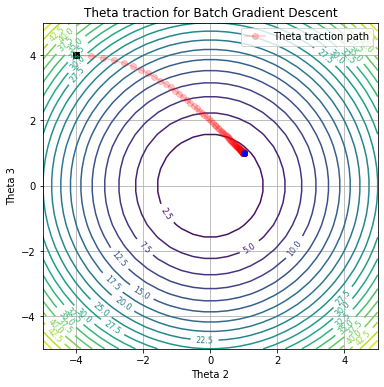

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(44)

x, y = np.linspace(-5, 5, 30), np.linspace(-5, 5, 30)

xx, yy = np.meshgrid(x, y)
zz = xx**2 + yy**2

x_flat, y_flat, z_flat = xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1), zz.flatten().reshape(-1, 1)
X = np.hstack((x_flat, y_flat, x_flat**2, y_flat**2))

eta = 1e-6
n_iter = 1000
m = X.shape[0]

theta = np.array([0, 0, -4, 4]).reshape(-1, 1)  # (4, 1)
thetas = [theta.copy()]

for i in range(n_iter):
    gradient = X.T.dot(X.dot(theta) - z_flat)   # (4, 1)
    theta = theta - eta * gradient
    thetas.append(theta.copy())

thetas_arr = np.array([thetas]).flatten().reshape(-1, 4)    # (m, 4)

# z = th0 * x + th1 * y + th2 * x**2 + th3 * y**2
th0, th1, th2, th3 = thetas_arr[:, 0], thetas_arr[:, 1], thetas_arr[:, 2], thetas_arr[:, 3]

fig, ax = plt.subplots(figsize=(6, 6))
cs = ax.contour(xx, yy, zz, cmap='viridis', levels=20)
ax.clabel(cs, inline=True, fontsize=8)

ax.plot(th2, th3, color='r', marker='o', alpha=0.2, label='Theta traction path')

# initial theta values
ax.plot(th2[0], th3[0], 'ks')

# final theta values
ax.plot(th2[-1], th3[-1], 'bo')

ax.set_xlabel('Theta 2')
ax.set_ylabel('Theta 3')
ax.set_title('Theta traction for Batch Gradient Descent')
ax.legend()

plt.grid()
plt.show()

### 3. Normal Equation - closed form

In [11]:
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(z_flat))

array([[3.54507343e-17],
       [2.70843610e-15],
       [1.00000000e+00],
       [1.00000000e+00]])

### 2. Stochastic Gradient Descent

The final theta is:
 [[5.74732154e-02]
 [3.09215706e-04]
 [1.01383546e+00]
 [1.03627252e+00]]


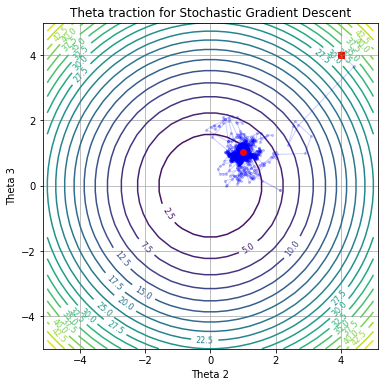

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

xx, yy = np.meshgrid(x, y)
zz = xx**2 + yy**2

x_flat, y_flat, z_flat = xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1), zz.flatten().reshape(-1, 1)
X = np.hstack((x_flat, y_flat,x_flat**2, y_flat**2))

# data standarization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

t0, t1 = 5, 50
n_epochs = 50
m = X.shape[0]

theta = np.array([0, 0, 4, 4]).reshape(-1, 1) * X_std.reshape(-1, 1) # size (4, 1)
thetas = [theta.copy()]

def learning_rate(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        rand_idx = np.random.randint(m)
        xi = X_scaled[rand_idx: rand_idx + 1]
        yi = z_flat[rand_idx: rand_idx + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # size (4, 1)
        eta = learning_rate(epoch * m + i)
        theta = theta - eta * gradients
        thetas.append(theta.copy())

print(f'The final theta is:\n {theta / X_std.reshape(-1, 1)}')

# extracting the thetas tracking values for X_scaled[:, 2] & X_scaled[:, 3]
thetas_arr = np.array(thetas).flatten().reshape(-1, 4) / X_std
th0, th1, th2, th3 = thetas_arr[:, 0], thetas_arr[:, 1], thetas_arr[:, 2], thetas_arr[:, 3]

fig, ax = plt.subplots(figsize=(6, 6))
cs = ax.contour(xx, yy, zz, cmap='viridis', levels=20)
ax.clabel(cs, inline=True, fontsize=8)

ax.plot(th2, th3, c='b', marker='o', markersize=2, alpha=0.2, linewidth=1)
ax.set_xlabel('Theta 2')
ax.set_ylabel('Theta 3')
ax.set_title('Theta traction for Stochastic Gradient Descent')

ax.axis('equal')

# the starting theta coordinates
ax.plot(th2[:1], th3[:1], 'rs')

# the final theta coordinates
ax.plot(th2[-1:], th3[-1:], 'ro')

plt.grid()
plt.show()

In [11]:
# Normal equation
theta_norm = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(z_flat))
theta_norm

array([[2.12704406e-16],
       [3.06294345e-15],
       [1.00000000e+00],
       [1.00000000e+00]])

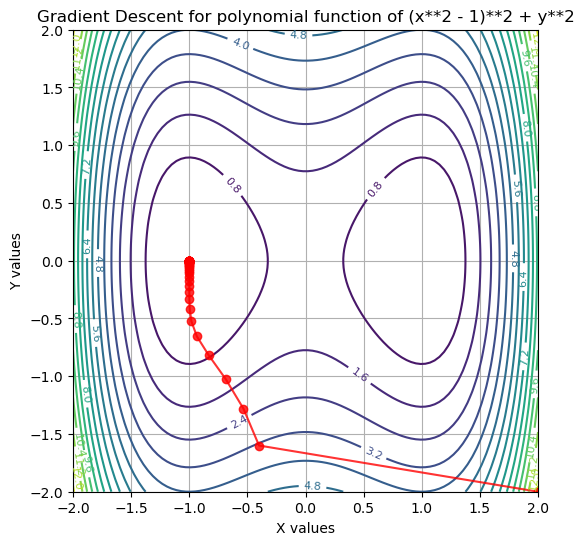

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x**2 - 1)**2 + y**2

def grad_f(x, y):
    df_dx = 4 * x * (x**2 - 1)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

def gradient(x0, eta, n_iter):
    x = x0
    points = [x0.copy()]

    for i in range(n_iter):
        x = x - eta * grad_f(*x)
        points.append(x.copy())
    return np.array(points)

if __name__ == "__main__":

    x0 = np.array([2, -2])
    eta = 0.1
    n_iter = 50

    points = gradient(x0, eta, n_iter)

x, y = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

fig, ax = plt.subplots(figsize=(6, 6))
cs = ax.contour(xx, yy, zz, cmap='viridis', levels=20)
ax.clabel(cs, inline=True, fontsize=8)

ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_title('Gradient Descent for polynomial function of (x**2 - 1)**2 + y**2')

ax.plot(points[:, 0], points[:, 1], marker='o', color='r', alpha=0.8)

plt.grid()
plt.show()

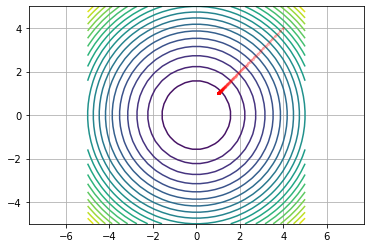

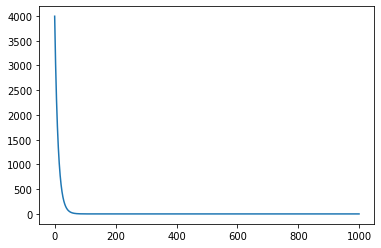

In [26]:
#  batch gradient descent

import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

xx, yy = np.meshgrid(x, y)
zz = xx ** 2 + yy ** 2

x_flat, y_flat, z_flat = xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1), zz.flatten().reshape(-1, 1)
X = np.hstack((x_flat, y_flat, x_flat**2, y_flat**2))

eta = 0.0001
n_iter = 1000
m = X.shape[0]

theta = np.array([0,0,4,4]).reshape(4, 1)  # size (4, 1)
thetas = [theta.copy()]

costs = []
for i in range(n_iter):
    pred = X.dot(theta)
    cost = np.mean((pred - z_flat)**2)
    costs.append(cost)

    gradient = (2 / m) * X.T.dot(X.dot(theta) - z_flat) # size (4, 1)
    theta = theta - eta * gradient
    thetas.append(theta.copy())

theta_arr = np.array(thetas).flatten().reshape(-1, 4)
t0, t1 = theta_arr[:, 2], theta_arr[:, 3]

plt.contour(xx,yy,zz,levels=20)
plt.axis('equal')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.plot(t0, t1, color='r', marker='o', alpha=0.2, markersize=2)

plt.grid()
plt.show()

plt.plot(costs)


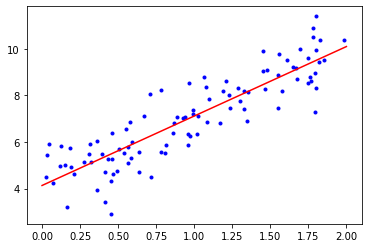

theta_best: 
[[4.13462248]
 [2.97891765]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X, y, 'b.')

X_b = np.c_[np.ones_like(X), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

X_new = np.array([0,2]).reshape(-1, 1)
X_new_b = np.c_[np.ones_like(X_new), X_new]
y_pred = X_new_b.dot(theta_best)
plt.plot(X_new, y_pred, 'r-')
plt.show()

print(f'theta_best: \n{theta_best}')

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.intercept_, lr.coef_

(array([4.37278712]), array([[2.81053298]]))

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty=None, max_iter=1000, tol=1e-3, eta0=0.1)
sgd_reg.fit(X, y.flatten())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.14676953]), array([3.0368386]))